In [6]:
import julia
from julia import Main

julia.install()


#Julia Implementation of RBF Kernel


In [7]:
Main.eval("""
using KernelFunctions
function rbf_julia(X, Y, length_scale)
    kernel = ScaledKernel(SqExponentialKernel(), 1.0 / length_scale)
    return kernelmatrix(kernel, X', Y')
end
""")


<PyCall.jlwrap rbf_julia>

The RBFKernel() function from the KernelFunctions.jl package in Julia computes the RBF kernel between all pairs of columns in X and Y using the formula:
$$
k(x, y) = \exp\left(-\frac{||x - y||^2}{2l^2}\right)
$$

The RBF class from sklearn.gaussian_process.kernels computes the RBF kernel between all pairs of rows in X and Y using the formula:
$$
k(x, y) = \exp\left(-\frac{||x - y||^2}{2l^2}\right)
$$

The rbf_kernel function from sklearn.metrics.pairwise computes the RBF kernel between two sets of samples X and Y using the formula:
$$
k(x, y) = \exp\left(-\gamma ||x - y||^2\right)
$$



In [8]:
from sklearn.gaussian_process.kernels import RBF as RBF_GP
from sklearn.metrics.pairwise import rbf_kernel as RBF_PW

# Instantiate the RBF kernel from sklearn.gaussian_process.kernels
rbf_gp = RBF_GP(length_scale=1)

# Use the rbf_kernel function from sklearn.metrics.pairwise
def rbf_pw(X, Y=None, length_scale=1.0):
    gamma = 1.0 / (2 * length_scale ** 2)
    return RBF_PW(X, Y, gamma=gamma)

In [9]:
# Generate some sample data
import numpy as np
X = np.random.rand(10, 2)
Y = np.random.rand(10, 2)

# Compute the RBF kernel using the three functions
K_gp = rbf_gp(X, Y)
K_pw = rbf_pw(X, Y)
K_julia = Main.rbf_julia(X, Y, 1.0)

# Compare the results
print("RBF_GP:", K_gp)
print("RBF_PW:", K_pw)
print("RBF_Julia:", K_julia)


RBF_GP: [[0.95258655 0.90669561 0.96066756 0.52569382 0.68574067 0.60803387
  0.68006819 0.81168482 0.8165708  0.87631712]
 [0.67677589 0.63935834 0.79444477 0.7147518  0.98644467 0.65843977
  0.7042507  0.69494261 0.9398131  0.93830169]
 [0.95095622 0.98216354 0.90192565 0.76583175 0.66937585 0.88448208
  0.92062991 0.9853525  0.81105606 0.77530891]
 [0.91219107 0.95092419 0.87615417 0.84057989 0.70382726 0.94144585
  0.96526774 0.9933483  0.82947701 0.77389594]
 [0.98023559 0.95917719 0.9993483  0.71290548 0.81547694 0.78451837
  0.84689252 0.9328468  0.93107196 0.94372597]
 [0.728897   0.76814745 0.74653612 0.99084714 0.79428578 0.99124484
  0.9814047  0.90147878 0.84083155 0.74146436]
 [0.97167781 0.93662955 0.99552744 0.63993483 0.78727535 0.71141033
  0.77993188 0.88413895 0.90466488 0.94005644]
 [0.83871711 0.88535618 0.81671507 0.91264277 0.72086181 0.98574831
  0.99151544 0.97213403 0.82248126 0.74404449]
 [0.91222942 0.86004675 0.96980653 0.59617582 0.8198822  0.64240202
  0.

In [10]:
# Compute the mean absolute difference between the kernel matrices
mad_gp_pw = np.mean(np.abs(K_gp - K_pw))
mad_gp_julia = np.mean(np.abs(K_gp - K_julia))
mad_pw_julia = np.mean(np.abs(K_pw - K_julia))

print("Mean Absolute Difference between RBF_GP and RBF_PW:", mad_gp_pw)
print("Mean Absolute Difference between RBF_GP and RBF_Julia:", mad_gp_julia)
print("Mean Absolute Difference between RBF_PW and RBF_Julia:", mad_pw_julia)

# Compute the mean squared difference between the kernel matrices
msd_gp_pw = np.mean((K_gp - K_pw) ** 2)
msd_gp_julia = np.mean((K_gp - K_julia) ** 2)
msd_pw_julia = np.mean((K_pw - K_julia) ** 2)

print("Mean Squared Difference between RBF_GP and RBF_PW:", msd_gp_pw)
print("Mean Squared Difference between RBF_GP and RBF_Julia:", msd_gp_julia)
print("Mean Squared Difference between RBF_PW and RBF_Julia:", msd_pw_julia)


Mean Absolute Difference between RBF_GP and RBF_PW: 2.886579864025407e-17
Mean Absolute Difference between RBF_GP and RBF_Julia: 4.773959005888173e-17
Mean Absolute Difference between RBF_PW and RBF_Julia: 3.219646771412954e-17
Mean Squared Difference between RBF_GP and RBF_PW: 3.697785493223493e-33
Mean Squared Difference between RBF_GP and RBF_Julia: 6.0397163055983715e-33
Mean Squared Difference between RBF_PW and RBF_Julia: 3.821045009664276e-33


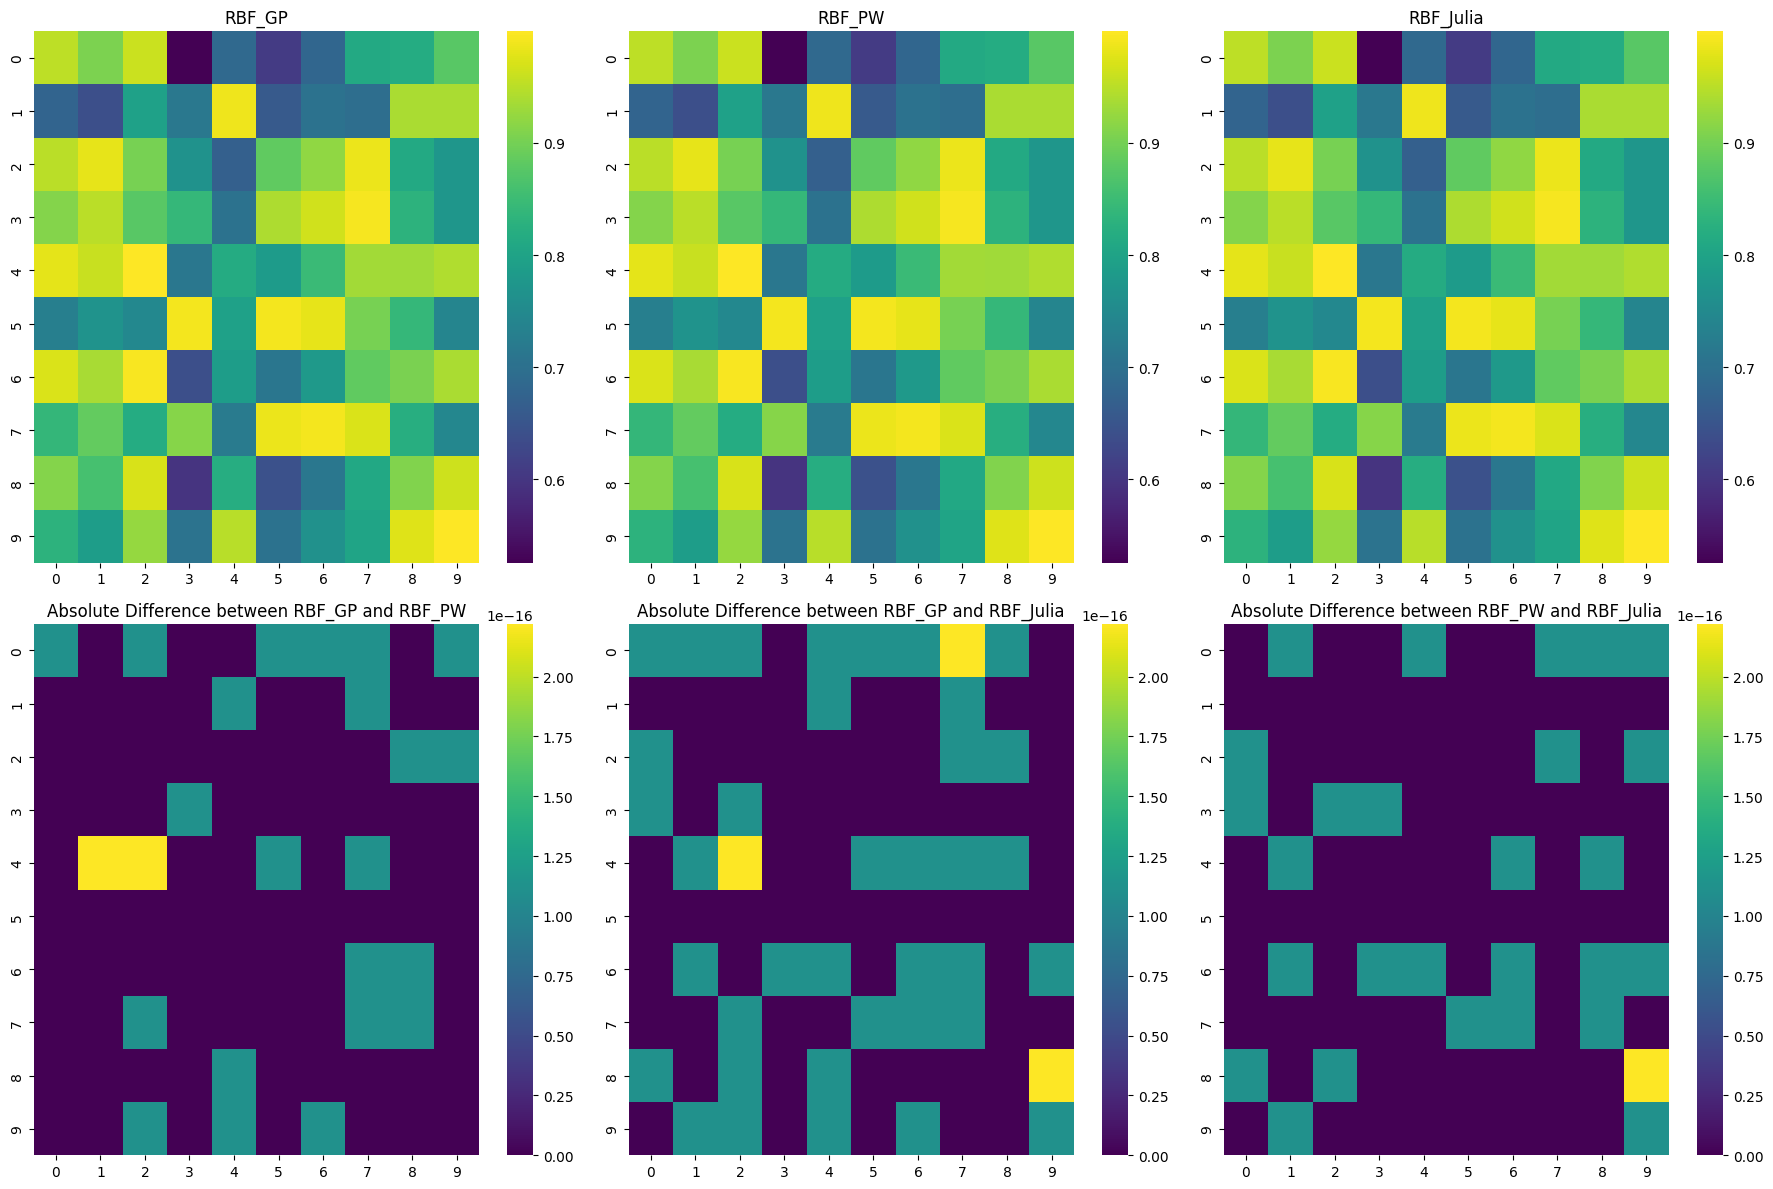

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a figure with multiple subplots
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

# Plot heatmaps of the kernel matrices
sns.heatmap(K_gp, ax=axs[0, 0], cmap='viridis')
axs[0, 0].set_title('RBF_GP')

sns.heatmap(K_pw, ax=axs[0, 1], cmap='viridis')
axs[0, 1].set_title('RBF_PW')

sns.heatmap(K_julia, ax=axs[0, 2], cmap='viridis')
axs[0, 2].set_title('RBF_Julia')

# Plot heatmaps of the differences between the kernel matrices
sns.heatmap(np.abs(K_gp - K_pw), ax=axs[1, 0], cmap='viridis')
axs[1, 0].set_title('Absolute Difference between RBF_GP and RBF_PW')

sns.heatmap(np.abs(K_gp - K_julia), ax=axs[1, 1], cmap='viridis')
axs[1, 1].set_title('Absolute Difference between RBF_GP and RBF_Julia')

sns.heatmap(np.abs(K_pw - K_julia), ax=axs[1, 2], cmap='viridis')
axs[1, 2].set_title('Absolute Difference between RBF_PW and RBF_Julia')

# Show the figure
plt.tight_layout()
plt.show()
